In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_music = pd.read_csv('../datasets/music_preferences_streaming.csv')
print(df_music.head())

  User_ID  Age    Country Streaming Platform Top Genre  \
0   U1000   34      Japan              Tidal    Reggae   
1   U1001   24    Germany             Deezer   Country   
2   U1002   49    Germany             Deezer       Pop   
3   U1003   55  Australia            YouTube    Reggae   
4   U1004   13    Germany       Amazon Music    Reggae   

   Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                       295                    138              Adele   
1                        86                    388         Ed Sheeran   
2                       363                    368        Post Malone   
3                       348                    349           Dua Lipa   
4                        30                    328              Adele   

  Subscription Type Listening Time (Morning/Afternoon/Night)  \
0              Free                                Afternoon   
1           Premium                                    Night   
2           Premium 

In [3]:
def pie_chart_generator(df_column, title = None):
    counts = df_column.value_counts()
    total = counts.sum()
    percentages = (counts/total)*100

    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=(df_column.unique()),autopct='%1.1f%%', startangle = 90)

    if title:
        plt.title(title)
    plt.show()

## Free vs Paid

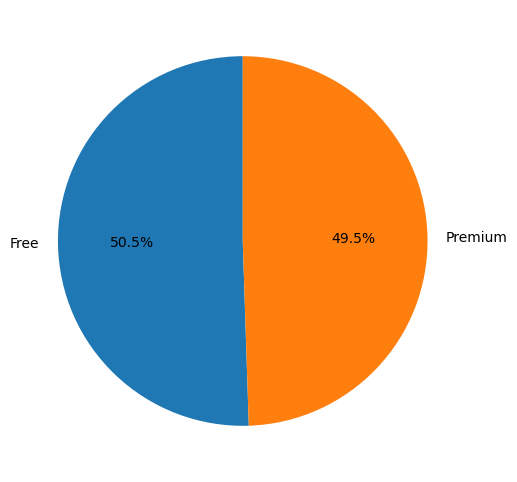

In [4]:
pie_chart_generator(df_music["Subscription Type"])

## Country

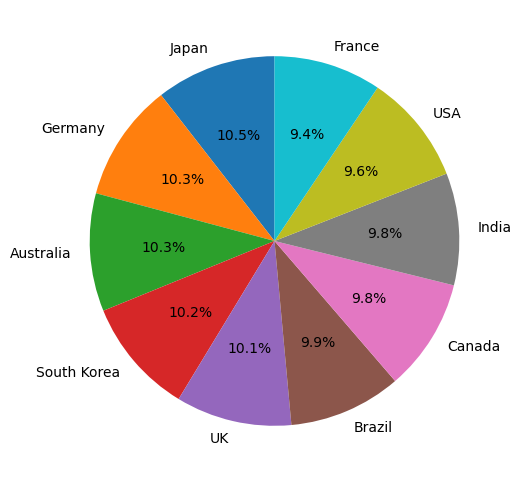

In [5]:
pie_chart_generator(df_music['Country'])

## Platform

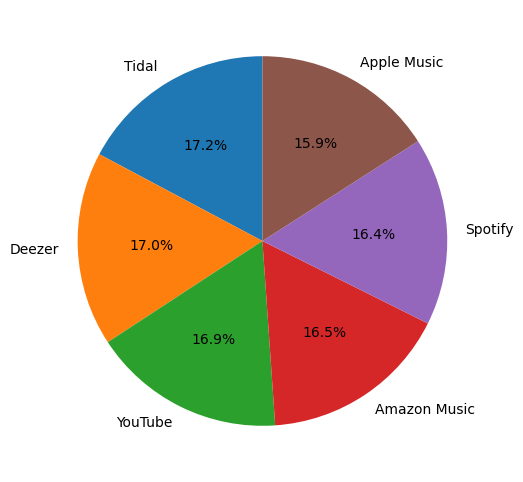

In [6]:
pie_chart_generator(df_music['Streaming Platform'])

## Genre

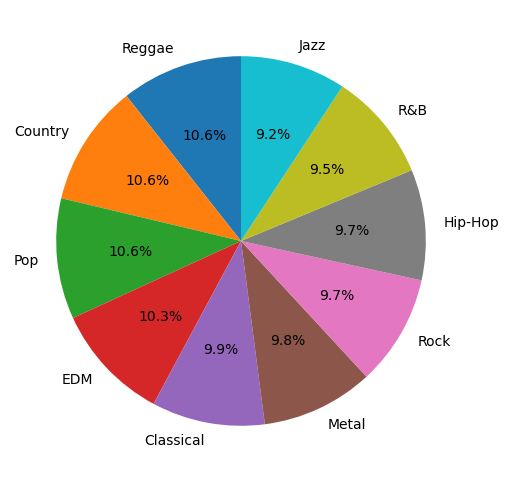

In [7]:
pie_chart_generator(df_music['Top Genre'])

## Time of the day

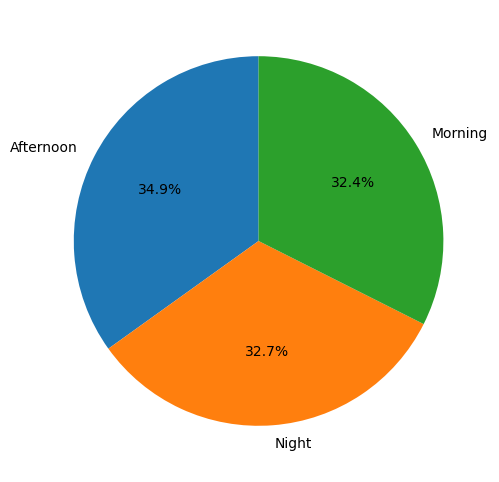

In [8]:
pie_chart_generator(df_music['Listening Time (Morning/Afternoon/Night)'])

## By country

In [9]:
list_of_countries = df_music['Country'].unique()

### Time of the day

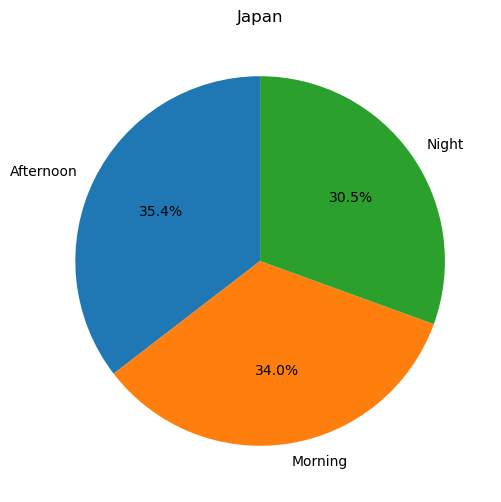

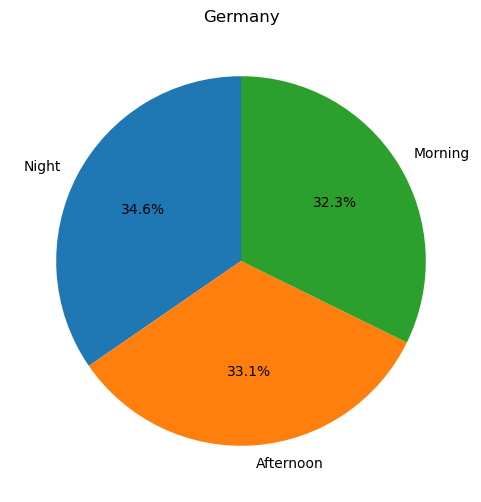

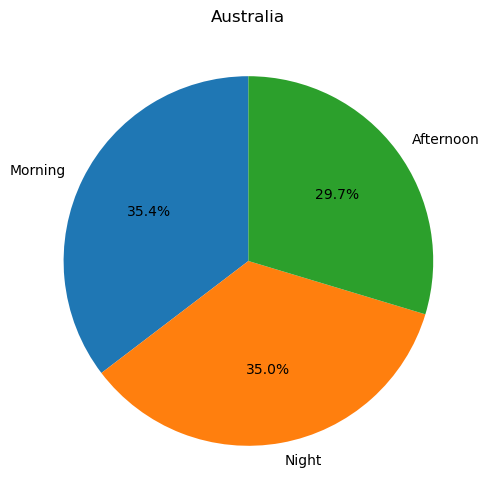

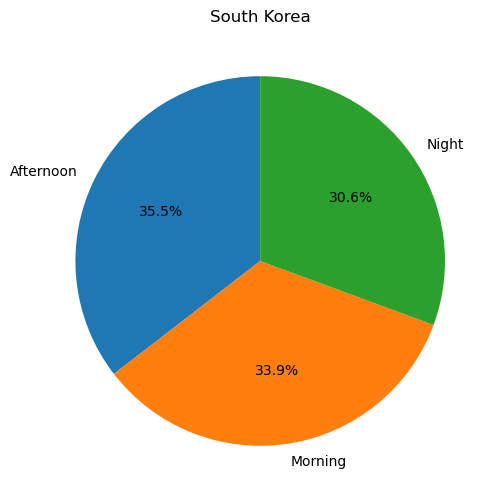

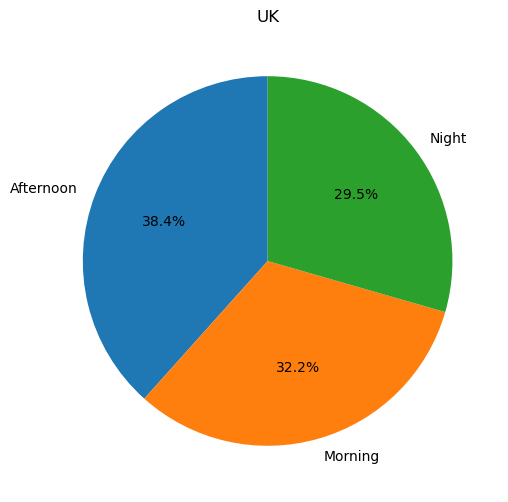

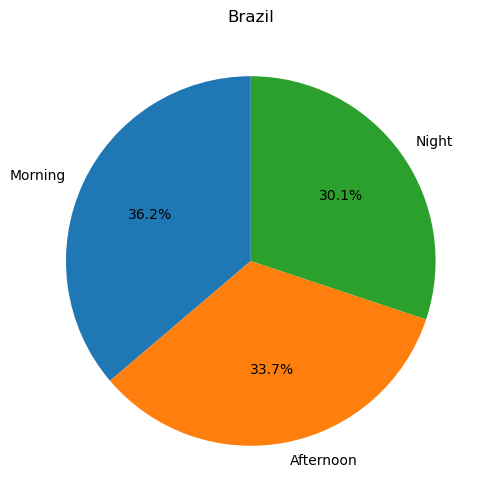

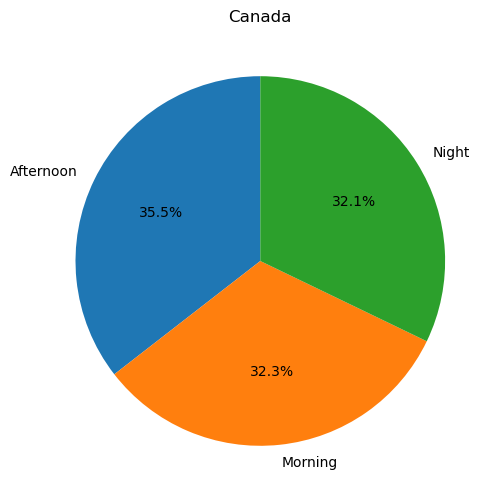

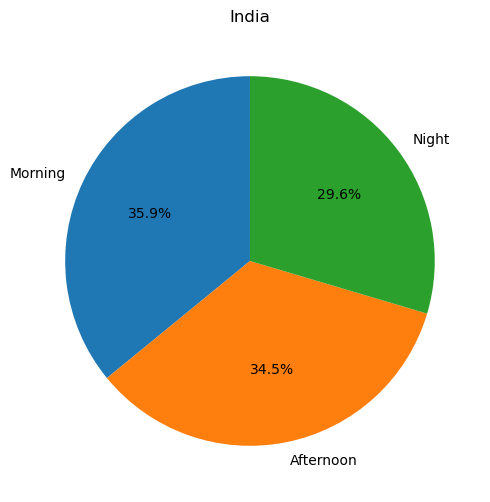

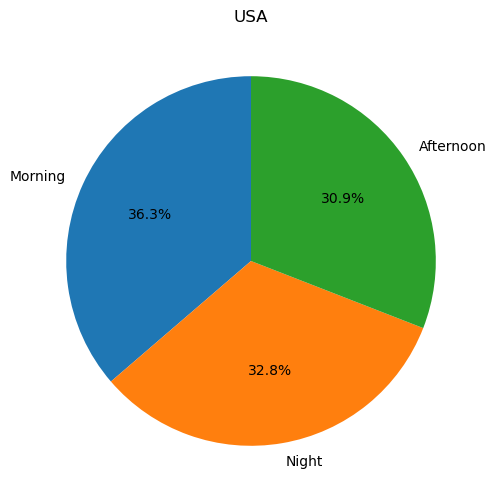

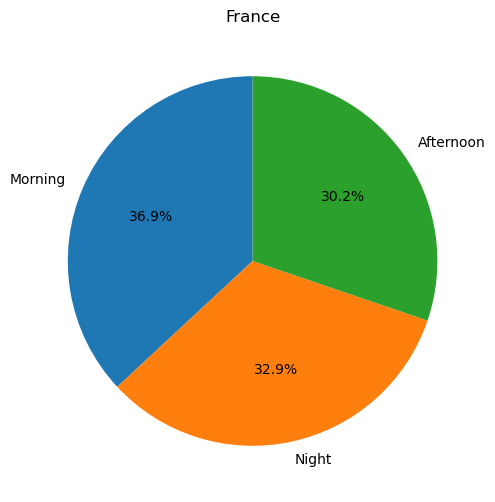

In [10]:
for country in list_of_countries:
    pie_chart_generator(df_music[df_music['Country'] == country]['Listening Time (Morning/Afternoon/Night)'], country)

### Genre

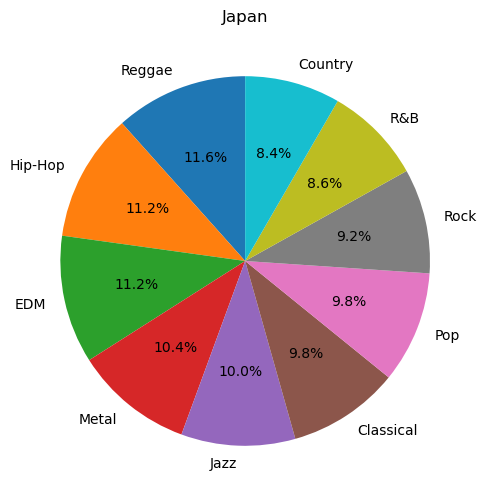

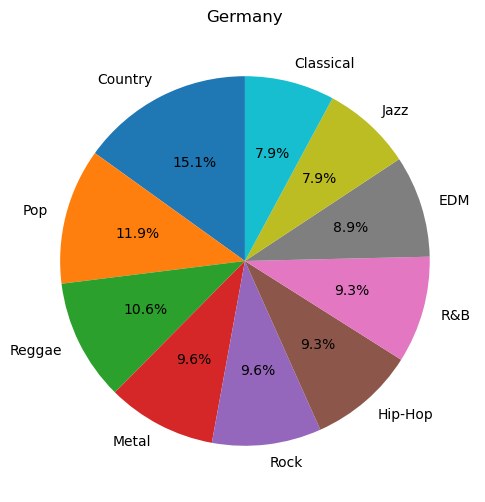

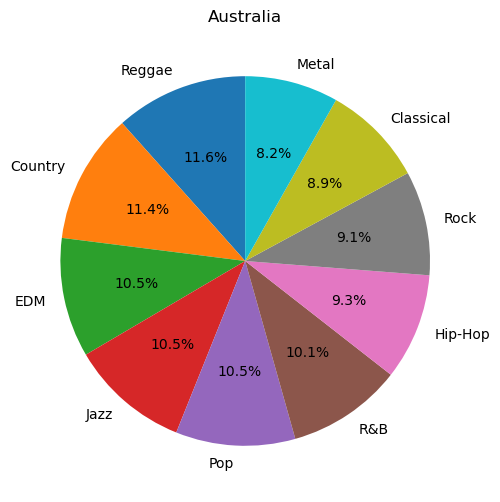

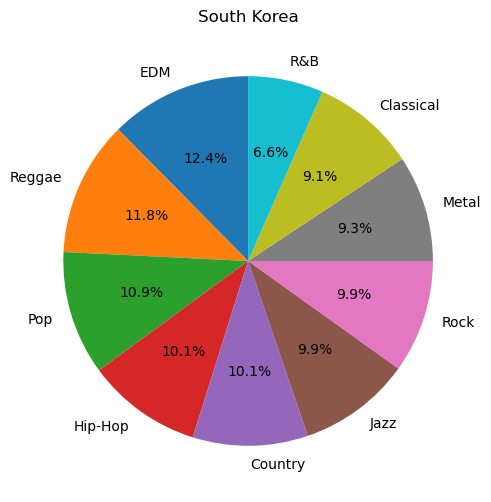

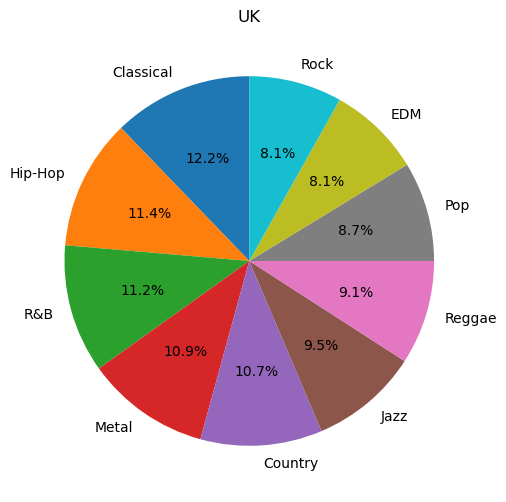

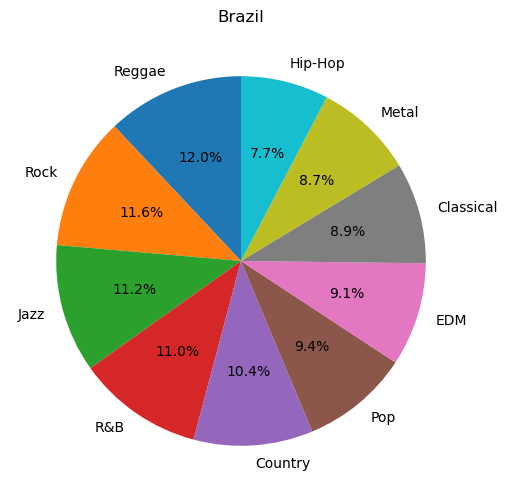

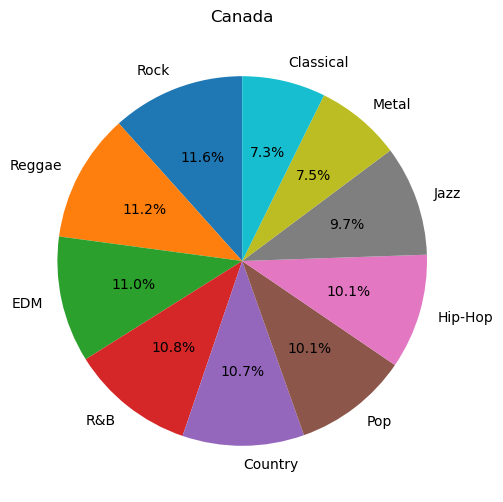

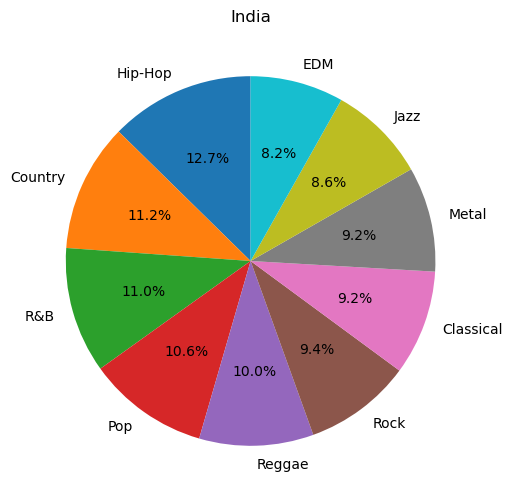

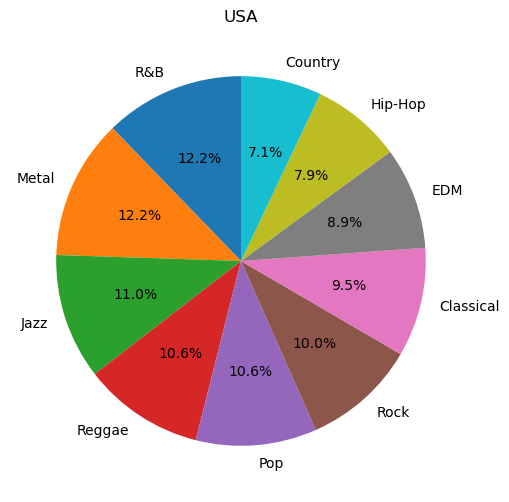

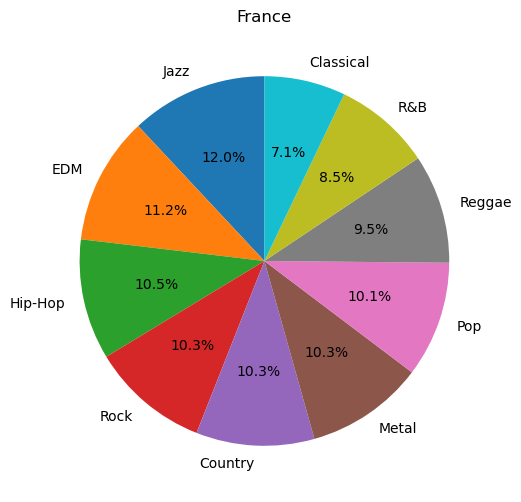

In [11]:
for country in list_of_countries:
    pie_chart_generator(df_music[df_music['Country'] == country]['Top Genre'], country)

### Platform

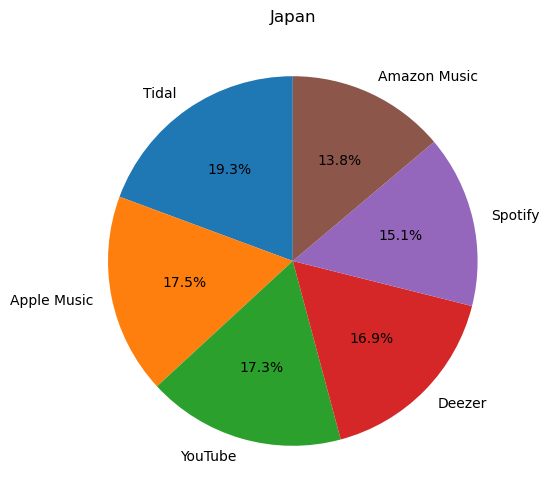

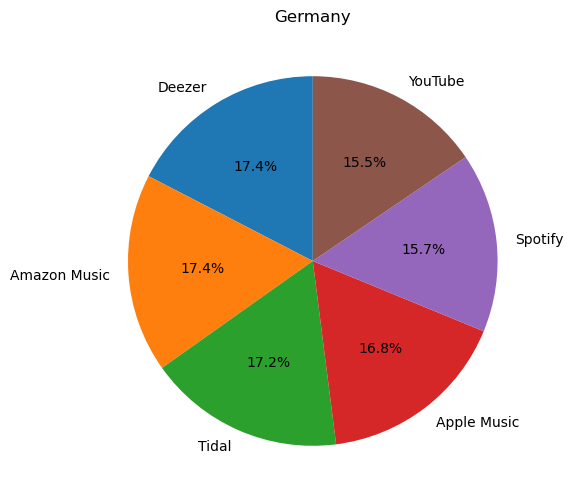

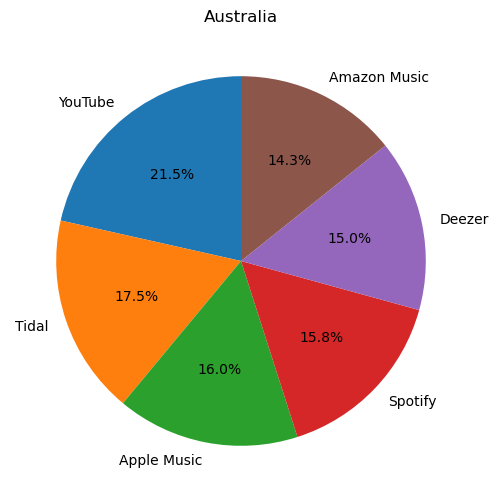

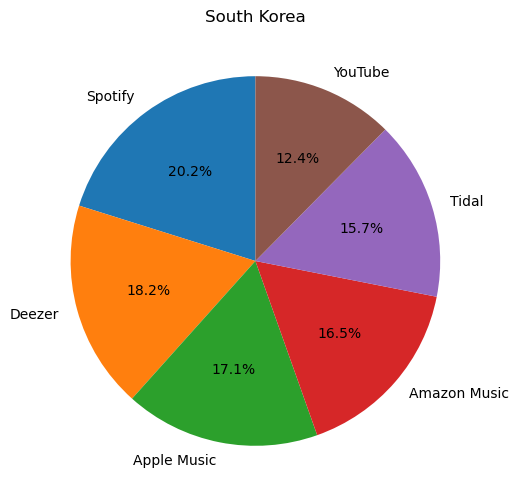

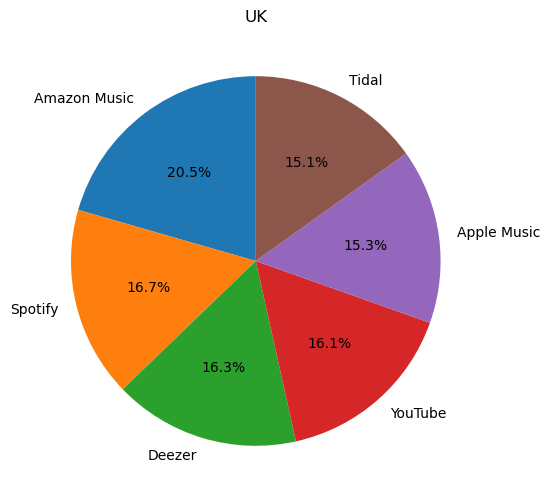

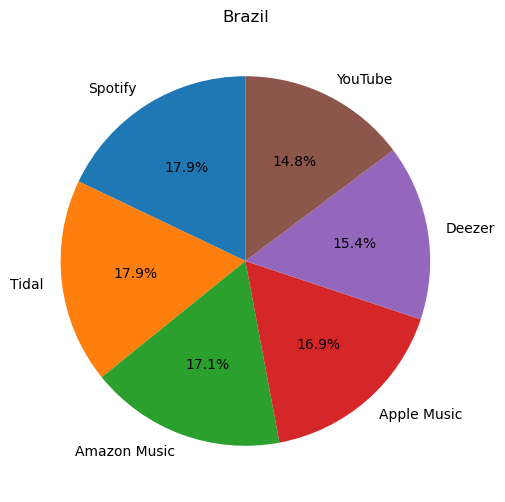

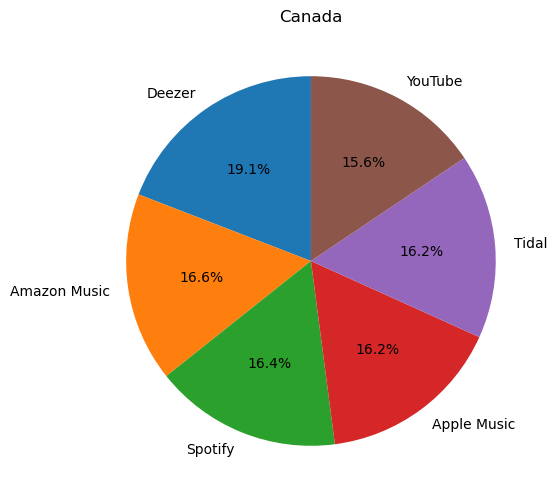

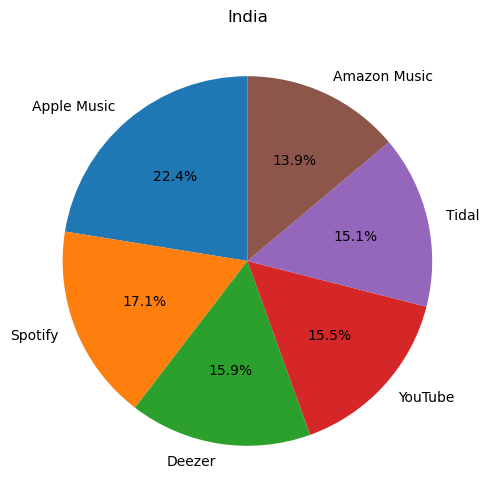

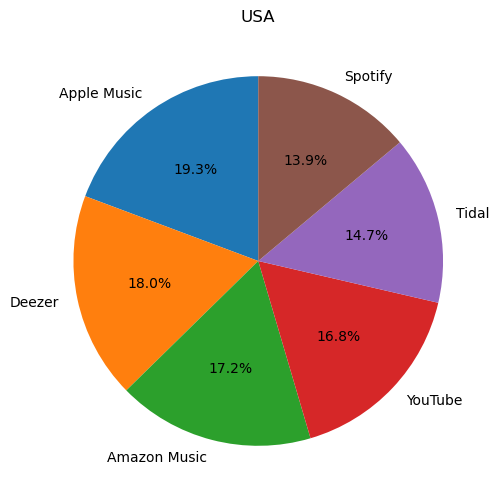

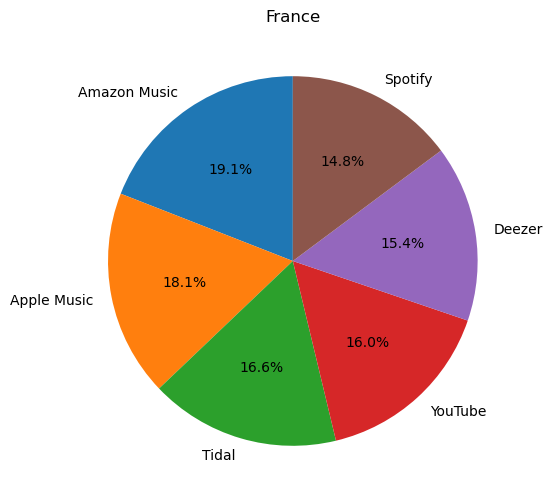

In [12]:
for country in list_of_countries:
    pie_chart_generator(df_music[df_music['Country'] == country]['Streaming Platform'], country)

### Free vs Paid

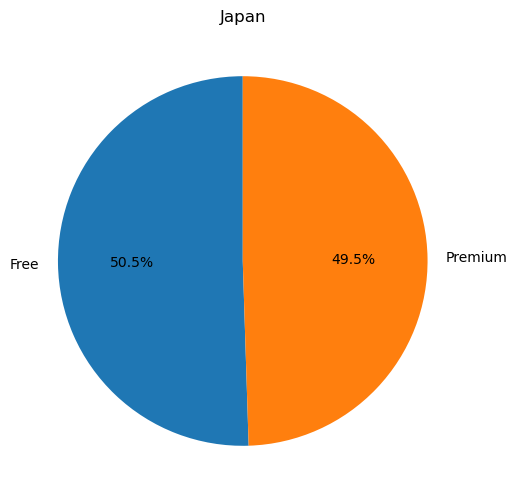

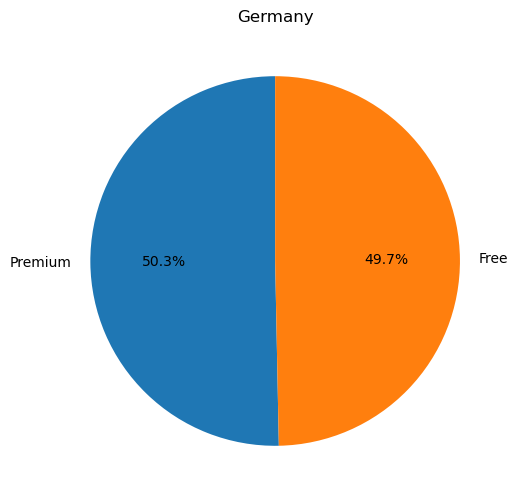

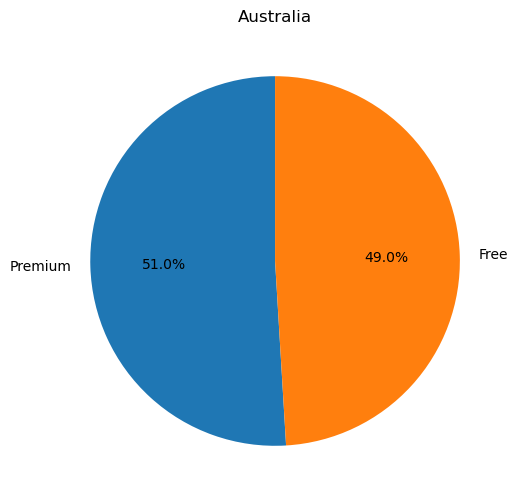

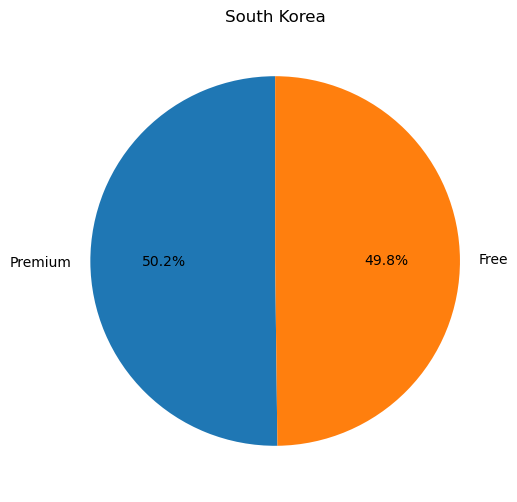

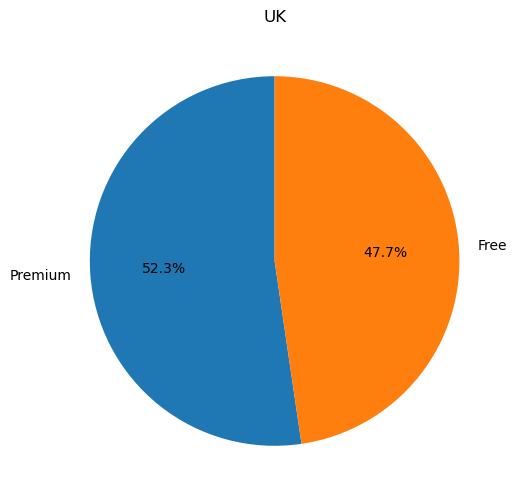

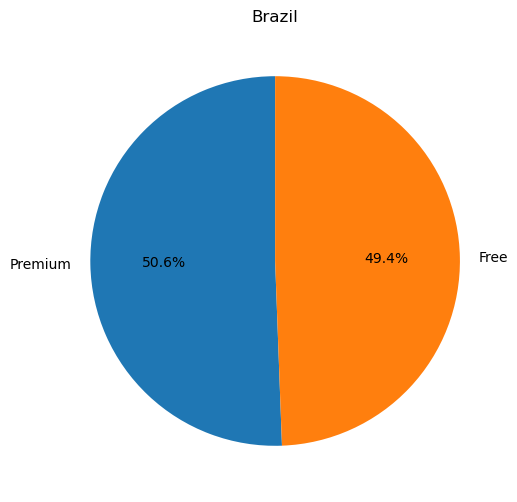

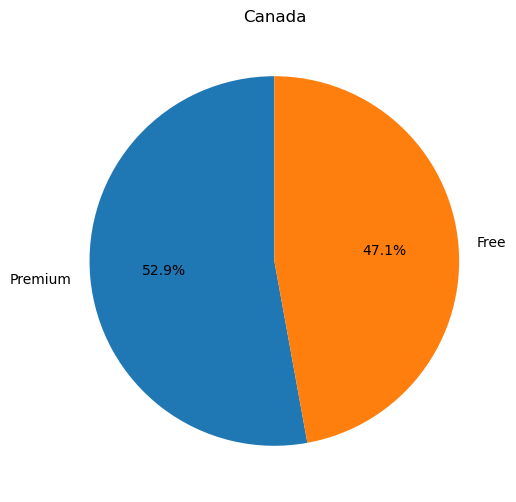

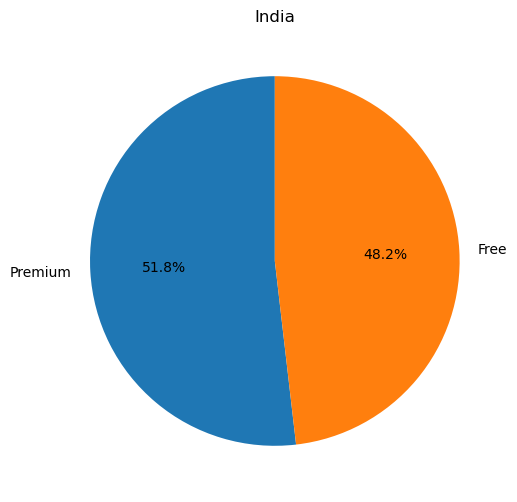

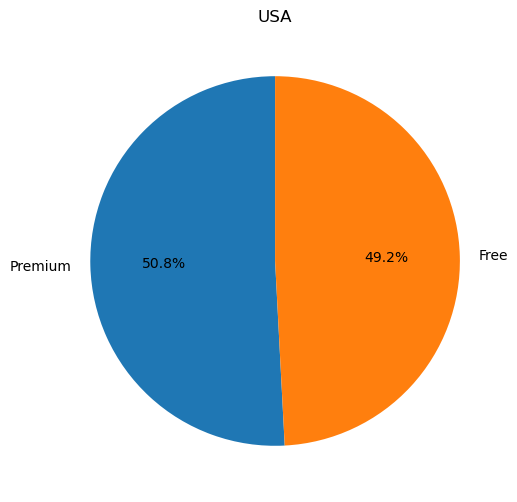

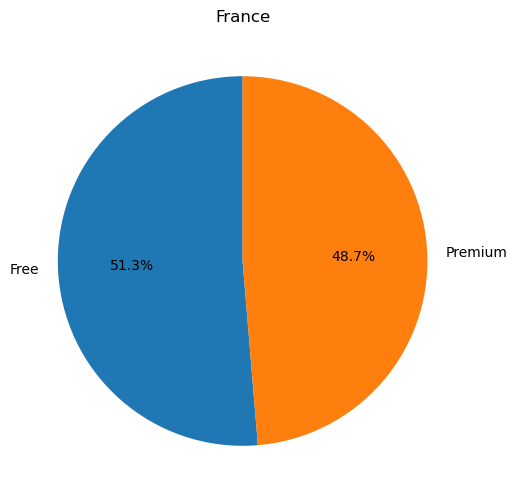

In [13]:
for country in list_of_countries:
    pie_chart_generator(df_music[df_music['Country'] == country]['Subscription Type'], country)

## Top artist

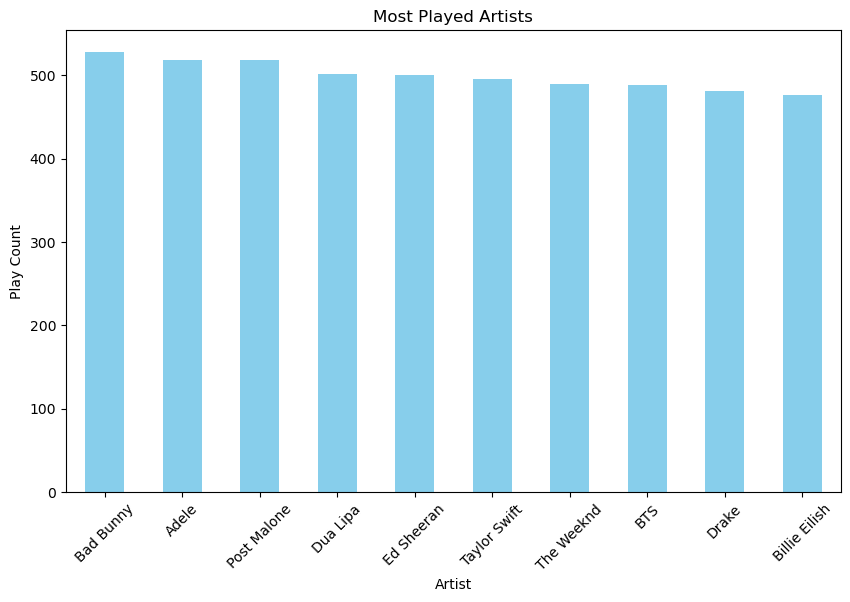

In [14]:
most_played = df_music["Most Played Artist"].value_counts()

plt.figure(figsize=(10, 6))
most_played.plot(kind="bar", color="skyblue")
plt.xlabel("Artist")
plt.ylabel("Play Count")
plt.title("Most Played Artists")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

### by country

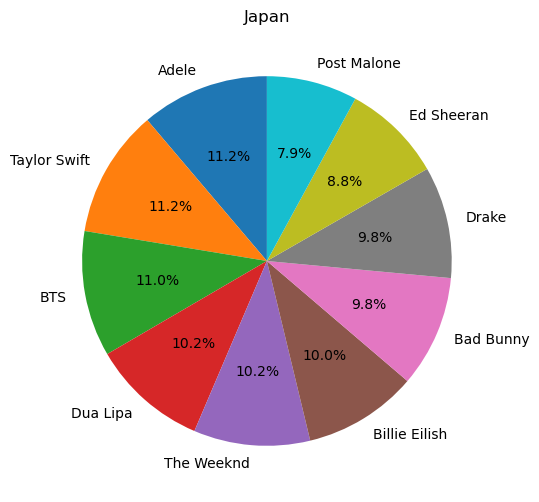

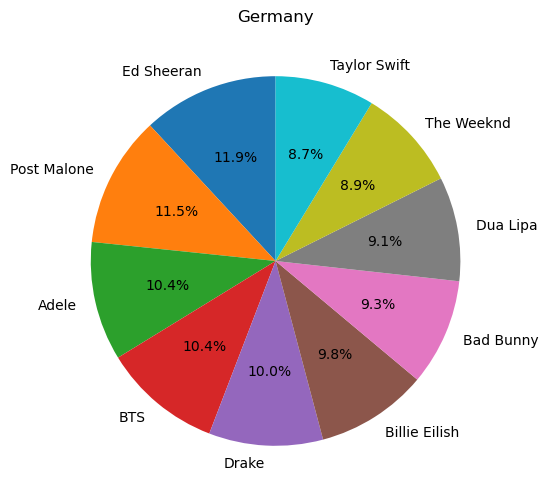

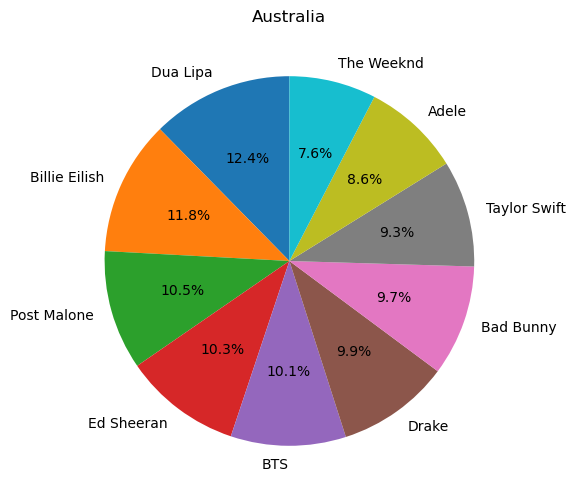

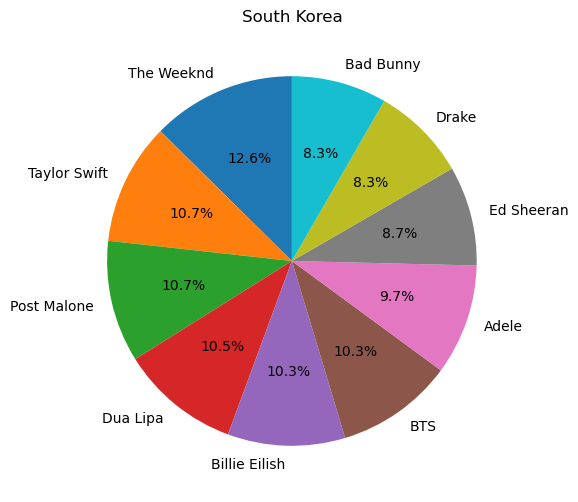

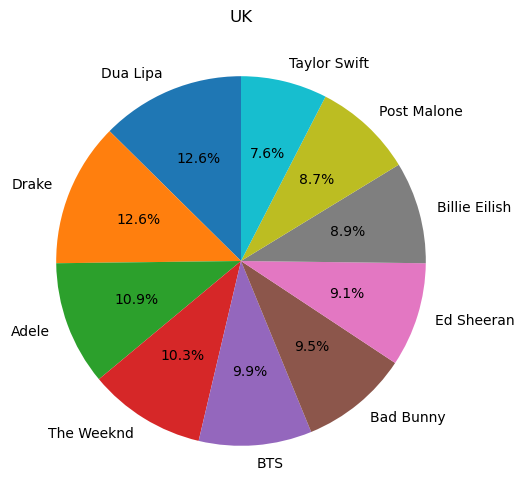

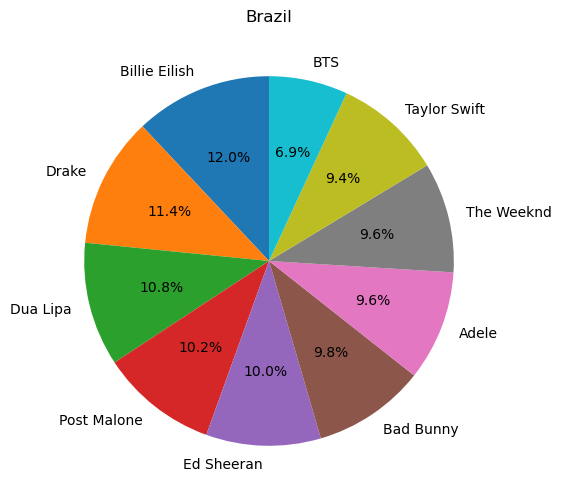

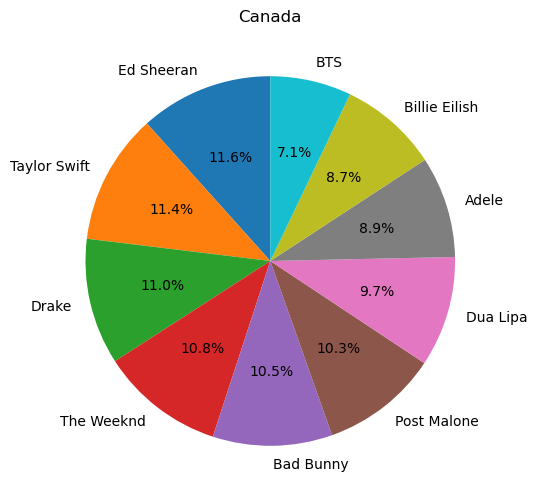

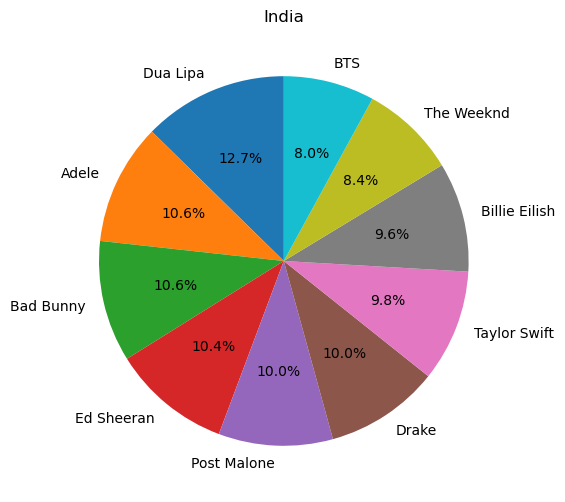

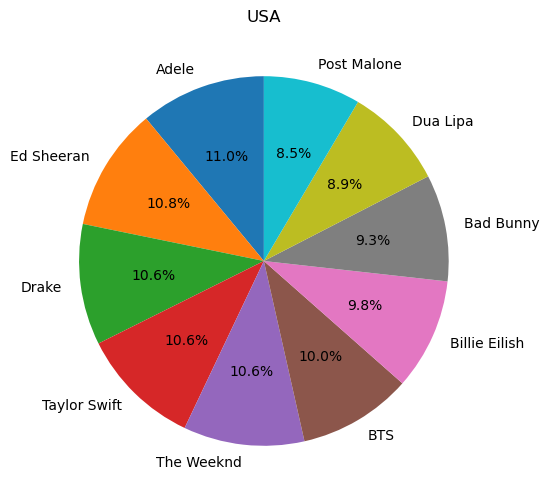

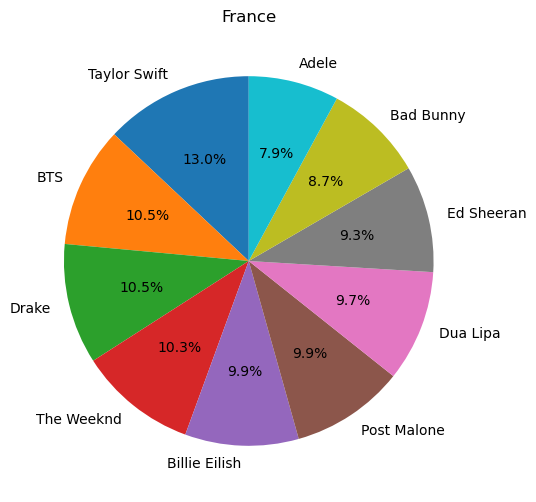

In [15]:
for country in list_of_countries:
    pie_chart_generator(df_music[df_music['Country'] == country]["Most Played Artist"], country)

## Streaming

In [16]:
def generate_scatter_plot(x, y, xAxisLabel, yAxisLabel, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=1)
    plt.xlabel(xAxisLabel)
    plt.ylabel(yAxisLabel)
    plt.title(title)

    plt.show()

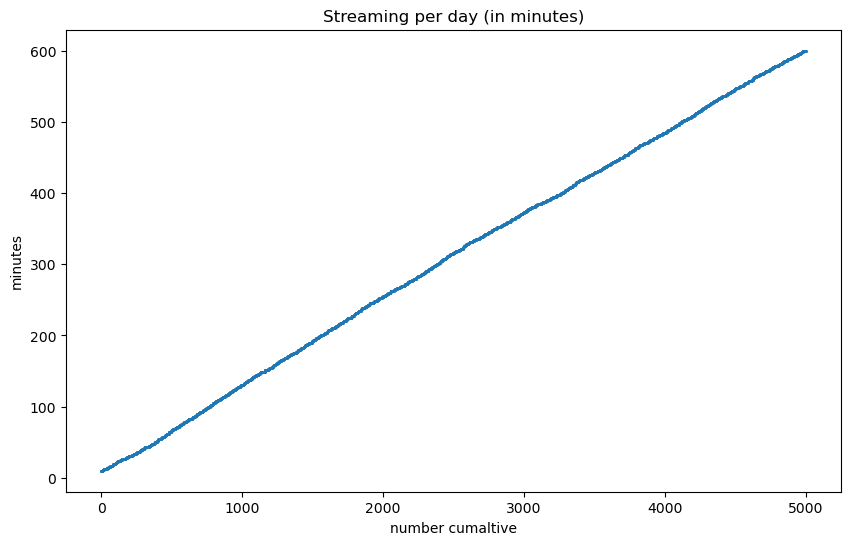

In [17]:
df_for_scatter_plot = df_music.copy().sort_values(by='Minutes Streamed Per Day', ascending=True).reset_index(drop=True)

generate_scatter_plot(
    df_for_scatter_plot.index,
    df_for_scatter_plot["Minutes Streamed Per Day"],
    "number cumaltive",
    "minutes",
    "Streaming per day (in minutes)",
)

### By country

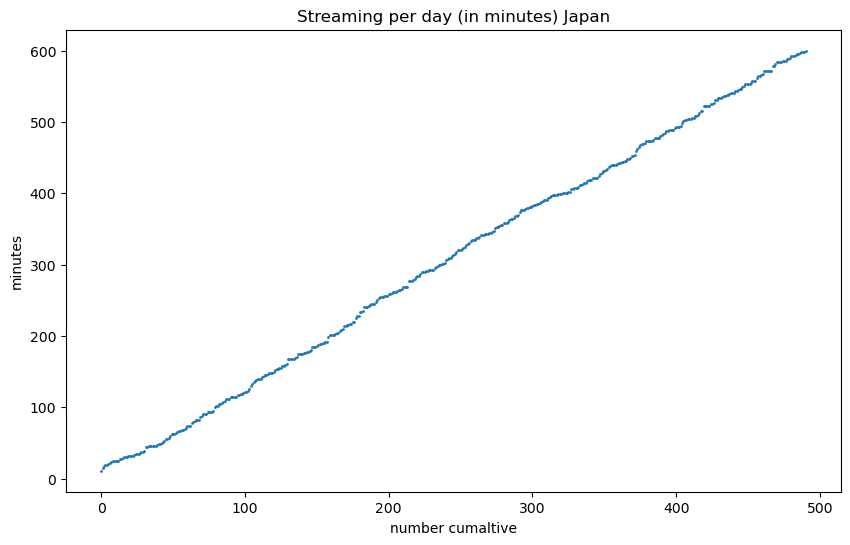

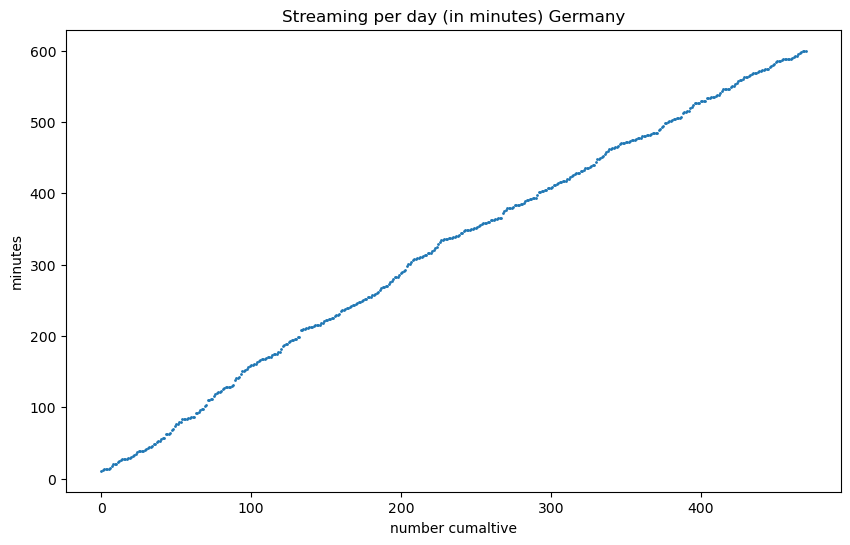

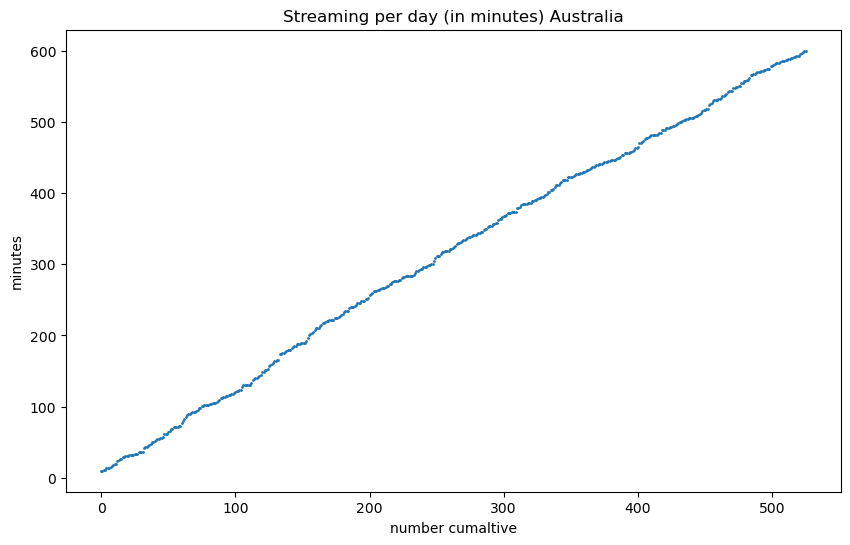

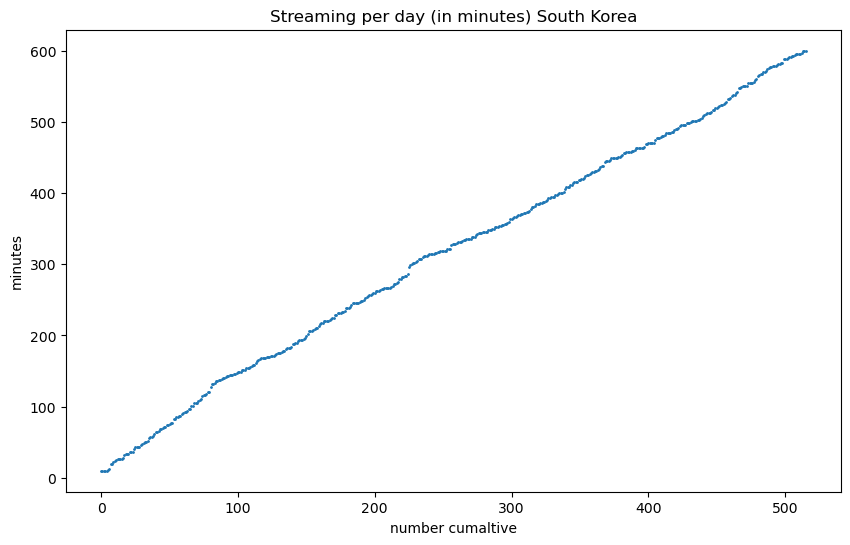

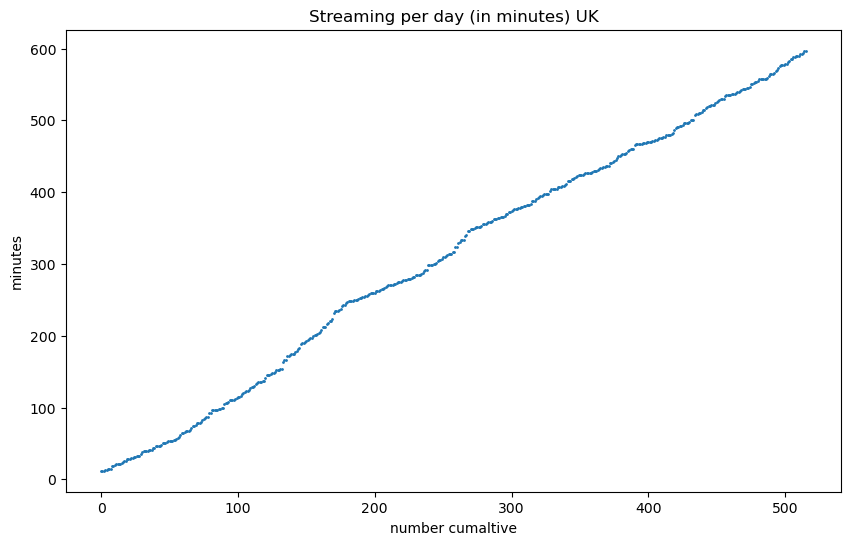

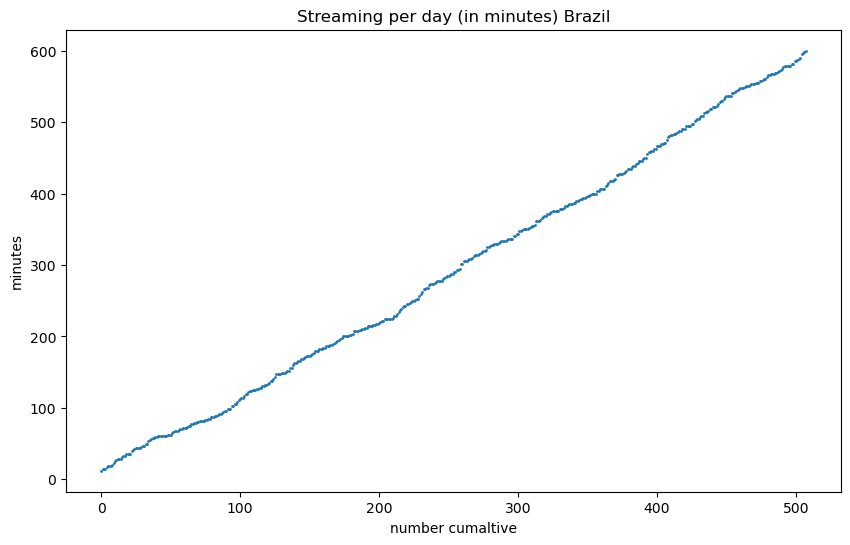

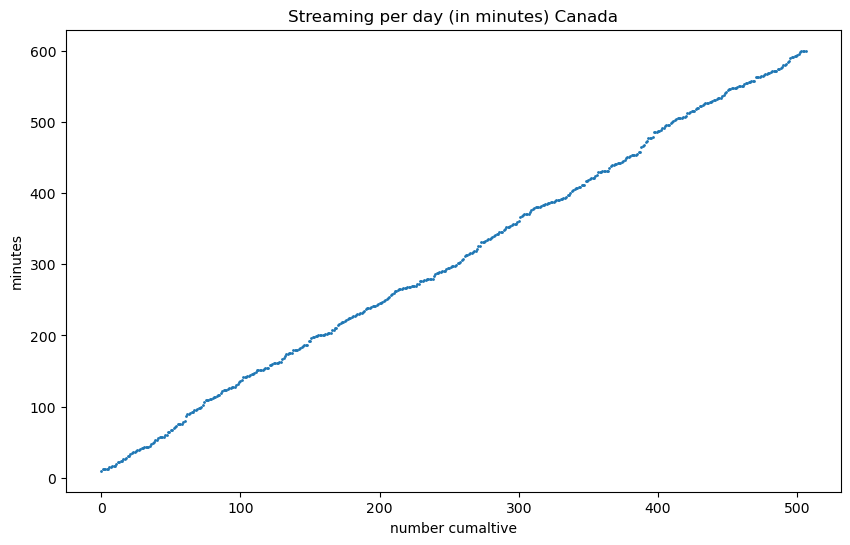

In [ ]:
for country in list_of_countries:
    df = df_music.copy()[df_music["Country"] == country]
    df = df.sort_values(by='Minutes Streamed Per Day', ascending=True).reset_index(drop=True)
    
    generate_scatter_plot(
        df.index,
        df["Minutes Streamed Per Day"],
        "number cumaltive",
        "minutes",
        "Streaming per day (in minutes)" + " " + country,
    )
